# Tutorial No. 2

## 1. Import Packages

In [1]:
#from keras.datasets import fashion_mnist
from keras.datasets import cifar10

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
import numpy as np

# Deal with Over-Fitting
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Augmentaion
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


## 2. Load Data

In [2]:
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Remove images to get smaller dataset
x_train = x_train[:1000,:,:]
y_train = y_train[:1000]
x_test = x_test[:500,:,:]
y_test = y_test[:500]

# Change the shape to (n_clss)x(Height)x(Weight)x(channels)
#x_train = np.expand_dims(x_train, axis=3)
#x_test =  np.expand_dims(x_test, axis=3)

# Change labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (1000, 32, 32, 3)
x_test shape: (500, 32, 32, 3)
y_train shape: (1000, 10)
y_test shape: (500, 10)


## 3. Define Parameters 

In [3]:
num_of_clss = 10        # number of classes
lr = 1e-4               # learning rate 
beta_1 = 0.9            # beta 1 - for adam optimizer
beta_2 = 0.95           # beta 2 - for adam optimizer
epsilon = 1e-7          # epsilon - for adam optimizer
epochs = 30              # number of epochs 
bs = 32                 # batch size
dp = 0.5                # dropout probability

steps_per_epoch = len((x_train)/bs)*2
#steps_per_epoch = 10

## 4. Build CNN Model

In [4]:
inp = Input(shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3]))

# First conv block
x = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(inp)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Second conv block
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(dp)(x)

# Third conv block
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# FC layers
x = Flatten()(x)
x = Dense(15, activation = 'sigmoid')(x)
x = BatchNormalization()(x)
x = Dropout(dp)(x)
out = Dense(num_of_clss, activation = 'softmax')(x)

model = Model(inp,out)


## 5. Apply Augmentation

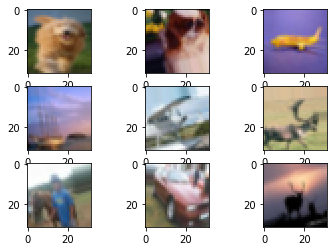

In [5]:
# Define wanted augmentation
datagen = ImageDataGenerator(
    validation_split=0.3,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Fit on our train set
datagen.fit(x_train)

# Visualize the augmentation
# configure batch size and retrieve one batch of images
# for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
#     # create a grid of 3x3 images
#     for i in range(0, 9):
#         plt.subplot(330 + 1 + i)
#         plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
#     # show the plot
#     plt.show()
#     break

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        #plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        plt.imshow(x_batch[i].astype('uint8')) #.shape
    # show the plot
    plt.show()
    break


##  6. Compile the Model

In [6]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# add early stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


## 7. Train the Model

In [7]:
# fits the model on batches with real-time data augmentation:
train_generator = datagen.flow(x_train, y_train, batch_size=bs)
val_generator = datagen.flow(x_train, y_train, batch_size=bs, subset='validation')


history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=steps_per_epoch,
                              callbacks=[monitor],
                              verbose=1)


Epoch 1/30
2000/2000 [==============================] - 124s 62ms/step - loss: 1.9069 - accuracy: 0.3013 - val_loss: 1.5411 - val_accuracy: 0.4313281 - accuracy: 0 - ETA: 57s - loss: 2.2238 - acc - ETA: 1s - l
Epoch 2/30
2000/2000 [==============================] - 122s 61ms/step - loss: 1.5755 - accuracy: 0.4163 - val_loss: 1.3126 - val_accuracy: 0.5282: 53s - loss: 1.6402 - accurac - ETA: 46s - loss: 1.6340 - accuracy: 0.39 - ETA: 43s - loss: 1.628 - ETA: 42s - - ETA: 36s -  - - ETA: 31s  - ETA: 3s - loss: 1.5795 - accuracy: 0.41 - ETA: 3s - los - ETA: 2s - l - ETA: 1s - loss: 1.5770 - accu
Epoch 3/30
2000/2000 [==============================] - 122s 61ms/step - loss: 1.4240 - accuracy: 0.4795 - val_loss: 1.6839 - val_accuracy: 0.3907: 58s - lo - ETA: 57s - loss: 1.4742 - accuracy: 0.46 - ETA: 47s - loss: 1.4754 - accuracy: 0 - ETA: 44s - loss: 1.4708 - ETA: 42s - loss: 1.4697 - accuracy: - ETA: 42s - loss - ETA: 40s - loss: 1 - ETA: 2s - loss: 1.4241  - ETA: 1s - loss: 1.4244  - ETA

2000/2000 [==============================] - 122s 61ms/step - loss: 0.7341 - accuracy: 0.7516 - val_loss: 0.4141 - val_accuracy: 0.8478loss: 0.7432 - accuracy:  - ETA: 57s - loss: 0.74 - ETA: 52s - loss: 0.7412 - accu - ETA: 51s - loss: - ETA: 49s - lo - ETA: 47s - loss: 0.7391 - ETA: 46s - loss: 0 - ETA: 38s - loss: 0.7396 - accur - ETA: 37s - loss: 0.7405 - accuracy: 0.748 - ETA: 37s - loss: 0.7406 - accurac - ETA: 37s - loss: 0.739 - ETA: 35s - l - ETA: 33s - loss: 0. - ETA: 32s - loss: 0.7373 - accuracy: 0. - ETA: 31 - ETA: 0s - loss: 0.734
Epoch 18/30
2000/2000 [==============================] - 122s 61ms/step - loss: 0.7325 - accuracy: 0.7539 - val_loss: 0.3585 - val_accuracy: 0.8819 - loss: 0.7376 - accuracy: 0.7 - ETA: 47s - loss: 0.7372 - accuracy: 0.753 - ETA: 47s - loss: 0 - ETA: 45s - loss: 0.7384 - accuracy: 0.7 - ETA: 45s - - ETA: 43s - loss: - ETA: 38s -  - ETA: 26s - loss: 0.
Epoch 19/30
2000/2000 [==============================] - 122s 61ms/step - loss: 0.7014 - accura

## 8. Visualize

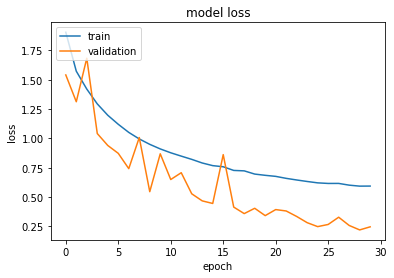

In [8]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()


## 9. Model Evaluation

500/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss: 2.2648925704956056
test accuracy: 0.518
Normalized confusion matrix
[[50.87719298  3.50877193  3.50877193  0.          7.01754386  0.
   1.75438596 10.52631579 15.78947368  7.01754386]
 [ 4.87804878 65.85365854  0.          0.          0.          0.
   0.          0.          7.31707317 21.95121951]
 [17.64705882  3.92156863 15.68627451  5.88235294 17.64705882  7.84313725
  17.64705882 11.76470588  0.          1.96078431]
 [18.36734694  2.04081633  0.         24.48979592  6.12244898 16.32653061
  10.20408163 12.24489796  0.         10.20408163]
 [ 7.5         2.5         2.5         2.5        47.5         5.
  10.         20.          0.          2.5       ]
 [10.41666667  0.          2.08333333 14.58333333  8.33333333 31.25
  12.5        16.66666667  0.          4.16666667]
 [ 3.7037037   0.          0.          5.55555556  5.55555556  0.
  75.92592593  1.85185185  0.          7.40740741]
 [10.63829787  0.          0.          4.25531915  6.38297872  2.12765957
   0.     

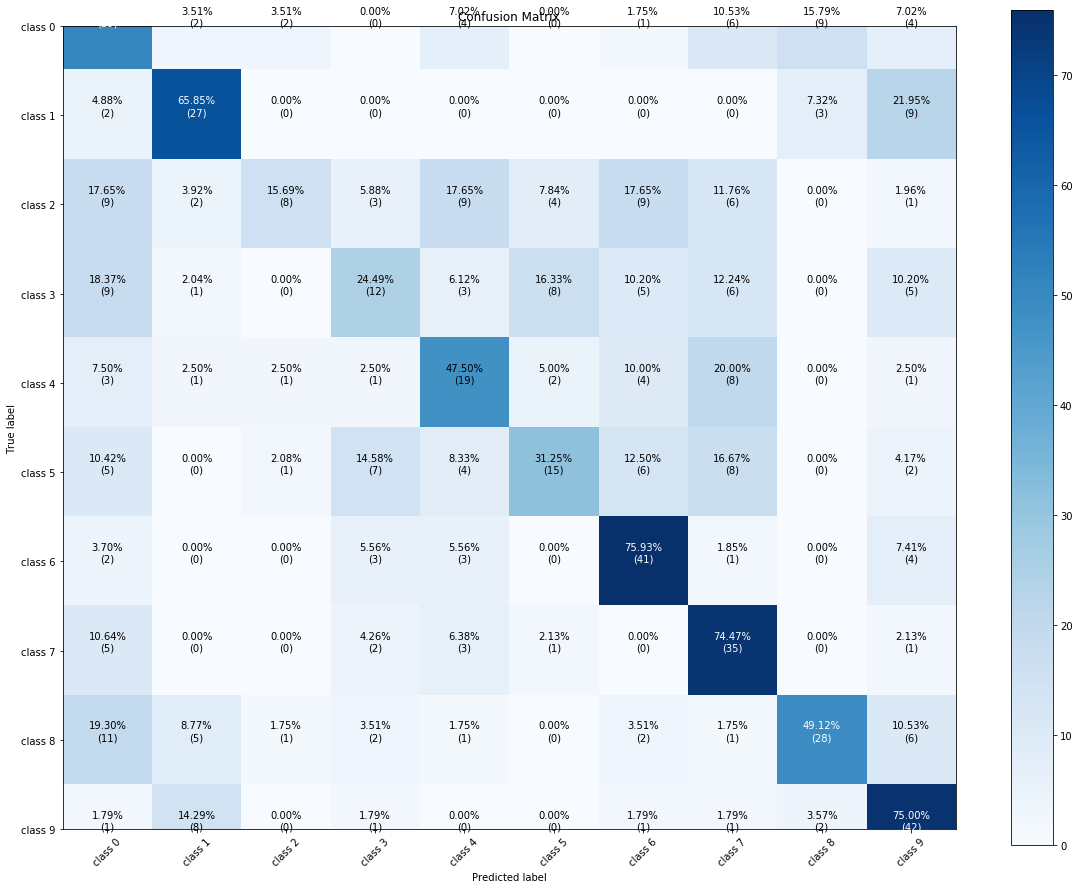

In [9]:
import tensorflow
y_pred = model.predict(tensorflow.cast(x_test, tensorflow.float32))
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


In [10]:
len((x_train)/512)

1000